In [2]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import tweepy

In [3]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

berawal dari keresahan penulis karena kualitas udara jakarta akhir akhir ini sangat buruk sampai - sampai menduduki peringkat satu dunia, sehingga penulis ingin mengetahui bagaimana respon masyarakat terhadap berita ini melalui twitter dan juga beberapa media dengan menggambil data dari headline google search dengan teks 'kualitas udara jakarta'. tweet diambil mulai dari tanggal 20 juni hingga 24 juni 2022 serta google search diambil pada tanggal 25 juni pada laman pertama pencarian google. Penulis ingin mencari apa saja yang beriringan dengan kualitas udara jakarta dari pandangan masyarakat.

In [69]:
api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

query = "kualitas udara jakarta -is:retweet lang:id"
start_time = '2022-06-20T00:00:00Z'
end_time = '2022-06-24T00:00:00Z'

response = tweepy.Paginator(api.search_recent_tweets,
                          query = query,
                          start_time = start_time,
                          end_time = end_time,
                          max_results=100
                          ).flatten(limit=1000)

tweets = [tweet.text.strip() for tweet in response]
df_tweets = pd.DataFrame(tweets, columns=["tweets"])
df_tweets

,tweets
0,@MetinBigwin__ok @aniesbaswedan @DKIJakarta Lo...
1,Kualitas Udara Jakarta Tempati Peringkat 1 Ter...
2,Penjelasan Kadis Lingkungan Hidup soal Kualita...
3,Penjelasan Kadis Lingkungan Hidup soal Kualita...
4,@detikcom Anies berush keras perbaiki kualitas...
...,...
736,Kualitas udara pagi ini di Jakarta 😭 diantara ...
737,"kualitas udara kota jakarta buruk, sebaiknya p..."
738,Kualitas udara ibu kota masuk kategori tidak s...
739,Masih ga ada gunung ya terlihat. Jadi jangan h...


In [70]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  741 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


<!DOCTYPE html>
<html lang="id"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>kualitas udara jakarta - Penelusuran Google</title><script nonce="WUgeSP11VJVkB6_RgS9juA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.googl
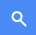
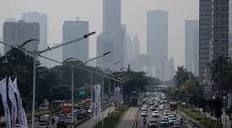
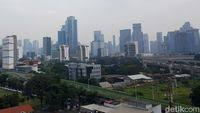
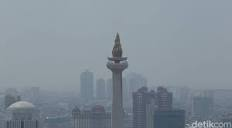
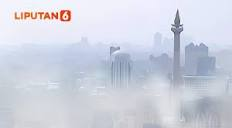
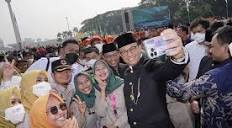
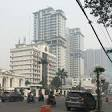
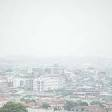

In [4]:
import requests
import bs4

text= "kualitas udara jakarta"
url = 'https://google.com/search?q=' + text
request_result=requests.get( url )
soup = bs4.BeautifulSoup(request_result.text,
                         "html.parser")
print(soup)

In [5]:
p = []
heading_object=soup.find_all( 'h3' )
for info in heading_object:
    row = info.getText()
    p.append({"text" : row})
    
dfsearch = pd.DataFrame(p)
dfsearch

,text
0,Indeks Kualitas Udara (AQI) Jakarta dan Polusi...
1,"Kualitas Udara Jakarta Hari Ini Tidak Sehat, B..."
2,Kualitas Udara Jakarta Hari Ini Terburuk Ke-2 ...
3,Laporan Pemantauan Kualitas Udara
4,BMKG Jelaskan Penyebab Kualitas Udara Jakarta ...
5,"Kualitas Udara Jakarta Terburuk, Ini Cara Meli..."
6,HEADLINE: Kualitas Udara di Jakarta Terburuk S...
7,"Lagi, Kualitas Udara Jakarta Terburuk di Dunia..."
8,"Kualitas Udara Jakarta Memburuk, Ini Dampaknya..."


In [6]:
dfsearch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [71]:
df_tweets.to_csv('df_tweets.csv', index = False)

In [7]:
df_tweettest = pd.read_csv('df_tweets.csv')
df_tweettest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  741 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB


In [8]:
df = df_tweettest

In [9]:
df = df.rename(columns={"tweets": "text"})

In [10]:
df = df.append(dfsearch)

C:\Users\Blambla\AppData\Local\Temp/ipykernel_12616/256090928.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfsearch)


In [11]:
df = df.reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    750 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB


In [13]:
def filtering_text(text):
    # mengubah review menjadi huruf kecil
    text = text.lower()
    # menghilangkan mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #menghilangkan karakter byte (b')
    text = re.sub(r'(b\'{1,2})',"", text)
    # menghilangkan yang bukan huruf
    text = re.sub('[^a-zA-Z]', ' ', text)
    # menghilangkan digit angka
    text = re.sub(r'\d+', '', text)
    #menghilangkan tanda baca
    text = text.translate(str.maketrans("","",string.punctuation))
    # menghilangkan whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_tweet'] = df['text'].apply(filtering_text)
df.head()

,text,clean_tweet
0,@MetinBigwin__ok @aniesbaswedan @DKIJakarta Lo...,ok loe mau kualitas udara jakarta bersih ikuti...
1,Kualitas Udara Jakarta Tempati Peringkat 1 Ter...,kualitas udara jakarta tempati peringkat terbu...
2,Penjelasan Kadis Lingkungan Hidup soal Kualita...,penjelasan kadis lingkungan hidup soal kualita...
3,Penjelasan Kadis Lingkungan Hidup soal Kualita...,penjelasan kadis lingkungan hidup soal kualita...
4,@detikcom Anies berush keras perbaiki kualitas...,anies berush keras perbaiki kualitas udara jak...


In [14]:
def stop_stem(text):
    #stopword
    with open('kamus.txt') as kamus:
        word = kamus.readlines()
        list_stopword = [line.replace('\n',"") for line in word]
    dictionary = ArrayDictionary(list_stopword)
    stopword = StopWordRemover(dictionary)
    text = stopword.remove(text)
    # stemming
    factory_stemmer = StemmerFactory()
    stemmer = factory_stemmer.create_stemmer()
    text = stemmer.stem(text)
    return text

df['cleaned'] = df['clean_tweet'].apply(stop_stem)

In [15]:
df['cleaned']

0      ok loe kualitas udara jakarta bersih ikut naek...
1      kualitas udara jakarta tempat peringkat buruk ...
2      jelas kad lingkung hidup soal kualitas udara d...
3      jelas kad lingkung hidup soal kualitas udara d...
4      anies berush keras baik kualitas udara jakarta...
                             ...                        
745    bmkg jelas sebab kualitas udara jakarta tidak ...
746    kualitas udara jakarta buruk cara lindung diri...
747    headline kualitas udara jakarta buruk dunia upaya
748       kualitas udara jakarta buruk dunia hari kumpar
749      kualitas udara jakarta buruk dampak untuk sehat
Name: cleaned, Length: 750, dtype: object

C:\Users\Blambla\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Blambla\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


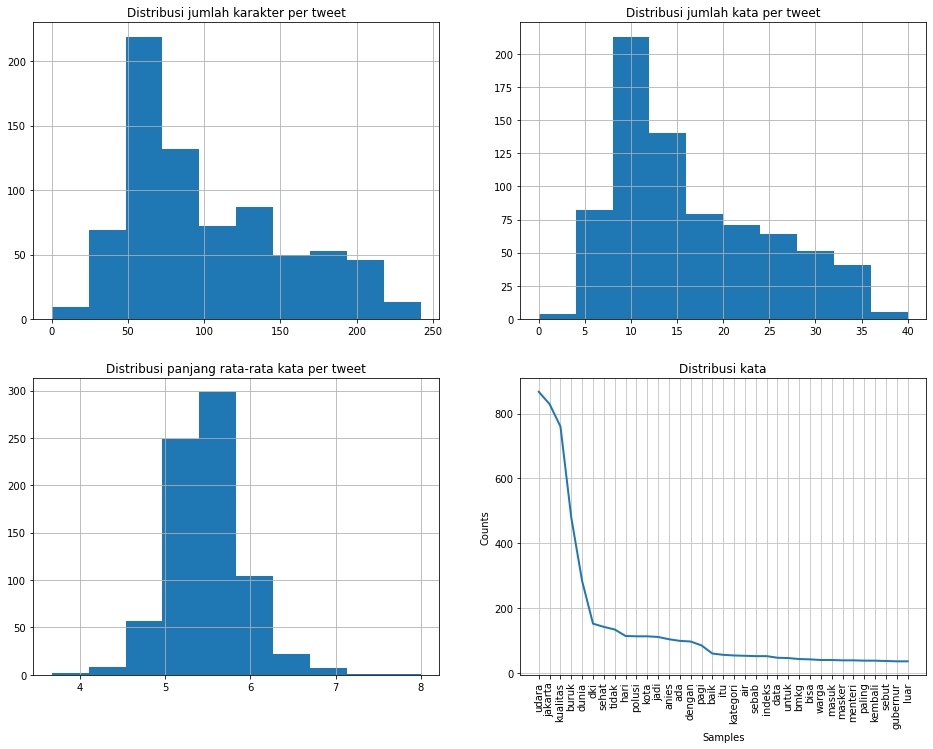

'Distribusi Bi-Gram'

(kualitas, udara)      733
(udara, jakarta)       493
(buruk, dunia)         248
(jakarta, buruk)       161
(dki, jakarta)         110
(tidak, sehat)          90
(udara, buruk)          80
(udara, dki)            56
(polusi, udara)         52
(dengan, kualitas)      47
(kategori, tidak)       40
(buruk, kualitas)       39
(jakarta, jadi)         38
(anies, baswedan)       35
(indeks, kualitas)      35
(jakarta, kualitas)     34
(iq, air)               32
(menteri, lhk)          30
(jakarta, pagi)         29
(ibu, kota)             28
(jakarta, kembali)      28
(dunia, kualitas)       27
(hari, akhir)           26
(kota, dengan)          25
dtype: int64

In [16]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
#Distribusi jumlah karakter per tweet
df['cleaned'].str.len().hist(ax=ax[0,0])
ax[0,0].set_title("Distribusi jumlah karakter per tweet")
#Distribusi jumlah kata per tweet
df['cleaned'].str.split().map(lambda x: len(x)).hist(ax=ax[0,1])
ax[0,1].set_title("Distribusi jumlah kata per tweet")
#Distribusi panjang rata-rata kata per tweet
df['cleaned'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(ax=ax[1,0])
ax[1,0].set_title("Distribusi panjang rata-rata kata per tweet")
#Distribusi Kata
temp_token = df['cleaned'].apply(lambda x: word_tokenize(str(x)))
tweets = [word for tweet in temp_token for word in tweet]
fqdist = FreqDist(tweets)
fqdist.plot(35,cumulative=False,title="Distribusi kata")
plt.show()

#2e) Distribusi bi-gram
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:24]
display("Distribusi Bi-Gram",result)

In [17]:
idsa = df.cleaned.str.contains('anies|baswedan ', flags = re.IGNORECASE, regex = True, na = False)

In [34]:
for i in range (10):
    df[idsa].clean_tweet.values[i]
    print(df[idsa].clean_tweet.values[i])
    print("------")

anies berush keras perbaiki kualitas udara jakarta yg sumber polusinya dr kendaraan dgn cr menggalakkan transportasi umum perbyk bus listrik jalur sepeda revitalisasi ratusan taman kota dls ditunggu action pemegang kekuasaan utk tindkn tegas dr sumber pabrik sekitaran jkt
------
sngat jelas yg dikatakan anies bhwa kualitas udara yg buruk di jakarta sifatnya temporal pnyebabnya bisa berasal dr daerah industri di luar jakarta misal banten tangerang atau bekasi jika kualitas udara yg buruk tsb konstan berarti sumbernya mmg dari dlm wilayah jakarta
------
asmara dah jangan berisik ntar di bully loh bos mu kaga memberikan penjelasan berapa lama kualitas udara jakarta yg buruk berlangsung terus apa hubungannya sama ktp pendatang pada kentut serempak apa nganies dan pendukungnya pada celangap serempak
------
kualitas udara jakarta sering terburuk di dunia anies berkelit begini
------
kualitas udara jakarta buruk penjelasan anies amp gt lt amp amp amp amp amp
------
udara jakarta puncak di baw

In [111]:
import pandas as pd
import numpy as np
import torch
import string
import re
import json
import torch.nn.functional as F
from torch import nn
from transformers import AutoModel
from transformers import BertTokenizer

with open("config.json") as json_file:
    config = json.load(json_file)

class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('indobenchmark/indobert-base-p1', return_dict=False)
        self.drop = nn.Dropout(p=0.2)
        self.out = nn.Linear(768, n_classes)
  
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask
        )
        output = self.drop(pooled_output)
        return self.out(output)

class Model:    
    def __init__(self):

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

        classifier = SentimentClassifier(len(config['CLASS_NAMES']))
        classifier.load_state_dict(
            torch.load(config['PRE_TRAINED_MODEL'], map_location=self.device)
        )
        classifier = classifier.eval()
        self.classifier = classifier.to(self.device)

    def predict(self, text):
        encoded_text = self.tokenizer.encode_plus(
            text,
            max_length=config['MAX_SEQUENCE_LEN'],
            add_special_tokens=True,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids = encoded_text['input_ids'].to(self.device)
        attention_mask = encoded_text['attention_mask'].to(self.device)

        with torch.no_grad():
            probabilities = F.softmax(self.classifier(input_ids, attention_mask), dim=1)
            confidence, predicted_class = torch.max(probabilities, dim=1)
            predicted_class = predicted_class.cpu().item()
            probabilities = probabilities.flatten().cpu().numpy().tolist()
        return (
            config['CLASS_NAMES'][predicted_class]
        )

model = Model()

In [143]:
dfs = df['cleaned']
dfs.head()

0    ok loe kualitas udara jakarta bersih ikut naek...
1    kualitas udara jakarta tempat peringkat buruk ...
2    jelas kad lingkung hidup soal kualitas udara d...
3    jelas kad lingkung hidup soal kualitas udara d...
4    anies berush keras baik kualitas udara jakarta...
Name: cleaned, dtype: object

In [144]:
l = []
for i in range(len(dfs)):
    review_text = dfs[i]
    sentiment = model.predict(review_text)
    l.append({"text" : review_text, "sentiment":sentiment})

dfsnew = pd.DataFrame(l)
dfsnew.head()

C:\Users\Blambla\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2285: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


,text,sentiment
0,ok loe kualitas udara jakarta bersih ikut naek...,negative
1,kualitas udara jakarta tempat peringkat buruk ...,negative
2,jelas kad lingkung hidup soal kualitas udara d...,negative
3,jelas kad lingkung hidup soal kualitas udara d...,negative
4,anies berush keras baik kualitas udara jakarta...,negative


In [145]:
dfsnew['sentiment'].value_counts()

negative    527
neutral     177
positive     46
Name: sentiment, dtype: int64

In [146]:
vectorizer = TfidfVectorizer (max_features=2500)

model_g = GaussianNB()

In [147]:
v_data = vectorizer.fit_transform(df['cleaned']).toarray()

In [148]:
vectorizer.fit_transform(df['cleaned'])

<750x1812 sparse matrix of type '<class 'numpy.float64'>'
	with 11019 stored elements in Compressed Sparse Row format>

In [149]:
X_train, X_test, y_train, y_test = train_test_split(v_data, dfsnew['sentiment'], test_size=0.2, random_state=18)

model_g.fit(X_train,y_train)

GaussianNB()

In [150]:
y_preds = model_g.predict(X_test)

In [151]:
print(confusion_matrix(y_test,y_preds))

print(classification_report(y_test,y_preds))

print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[82 23  8]
 [12 17  1]
 [ 5  0  2]]
              precision    recall  f1-score   support

    negative       0.83      0.73      0.77       113
     neutral       0.42      0.57      0.49        30
    positive       0.18      0.29      0.22         7

    accuracy                           0.67       150
   macro avg       0.48      0.53      0.49       150
weighted avg       0.72      0.67      0.69       150

nilai akurasinya adalah  0.6733333333333333
